<h1>Problem Statement</h1>
<p>Organizing and participating in effective study sessions for the data community is challenging due to differing schedules, academic backgrounds, and geographical locations. Individuals often struggle to find like-minded peers for collaboration, resulting in missed opportunities for learning and knowledge exchange. The MVP aims to address these challenges by providing an Intelligent Session Matching system to connect users based on common availability and interests</p>

<h1>Solution</h1>
<p>Making a KNN based model to group students based on their similarities and differences and assigning them to the groups</p>

<h1>Dataset</h1>
The dataset used to train this model has the following fields:
1. UserID: Helps to uniquely identify each user. This field is not used for KNN modeling but helps distinguish users.

2. Latitude: Helps match users who are geographically close to each other, which can be useful for real-time study group meetings or collaborations based on proximity.

3. Longitude: Similar to latitude, used to calculate geographic distance between users, which might influence session matching if location is a factor.

4. Availability (Hour_0 to Hour_23): Represents hourly availability, which is critical for matching users who can attend study sessions at the same time. The KNN model can use these features to match users with overlapping availability.

5. Days_Available (Monday to Sunday): Helps match users based on which days they are available. If two users are available on the same days, they are more likely to be matched.

6. Skill_Level: Ensures users with similar levels of proficiency are grouped together, making study sessions more effective and balanced.

7. Preferred_Group_Size: Helps the KNN model match users who prefer a similar group size, ensuring they are comfortable in the study group environment.

8. Topics of Interest: Matches users based on overlapping areas of interest, which ensures that participants in study groups share common learning goals.


In [2]:
import pandas as pd
data = pd.read_csv("../data/data.csv")
print(data.head())

                                 UserID   Latitude   Longitude   Skill_Level  \
0  1afdeab6-19dc-4103-8149-0dc88ae92a14 -14.149383  120.224832      Beginner   
1  89146df8-2fa6-4782-9def-4a633b000565   8.694429  -79.993603      Beginner   
2  410915aa-a314-4f2a-9a11-7a66ade28b95  65.474320  -18.899491      Beginner   
3  3bee7316-5520-47cc-9758-7bbf8188fc2e -36.481087  105.830074  Intermediate   
4  eba488df-0c8f-483c-a40e-0beb5fc89854 -36.127814 -128.109243      Beginner   

  Preferred_Group_Size  Big Data  Data Analysis  Machine Learning  Python  \
0               Medium         0              1                 1       1   
1               Medium         0              0                 0       1   
2               Medium         1              1                 0       0   
3                Small         0              0                 0       0   
4                Large         0              1                 0       0   

   SQL  ...  Hour_21  Hour_22  Hour_23  Monday  Tuesday 

<h1>Data Preprocessing</h1>

<h2>Categorical Data Conversion</h2>
<p>We need to convert skill level and preferred group size field to numeric values as KNN understands numeric values more easily than categorical values. This is done using Label Encoder</p>

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convert categorical data into numeric form
label_encoder = LabelEncoder()

data['Skill_Level'] = label_encoder.fit_transform(data['Skill_Level'])
data['Preferred_Group_Size'] = label_encoder.fit_transform(data['Preferred_Group_Size'])
print(data.head())

                                 UserID   Latitude   Longitude  Skill_Level  \
0  1afdeab6-19dc-4103-8149-0dc88ae92a14 -14.149383  120.224832            1   
1  89146df8-2fa6-4782-9def-4a633b000565   8.694429  -79.993603            1   
2  410915aa-a314-4f2a-9a11-7a66ade28b95  65.474320  -18.899491            1   
3  3bee7316-5520-47cc-9758-7bbf8188fc2e -36.481087  105.830074            2   
4  eba488df-0c8f-483c-a40e-0beb5fc89854 -36.127814 -128.109243            1   

   Preferred_Group_Size  Big Data  Data Analysis  Machine Learning  Python  \
0                     1         0              1                 1       1   
1                     1         0              0                 0       1   
2                     1         1              1                 0       0   
3                     2         0              0                 0       0   
4                     0         0              1                 0       0   

   SQL  ...  Hour_21  Hour_22  Hour_23  Monday  Tuesday 

<h2>Normalization of Numeric Features</h2>
<p>We need to normalize the numeric features with larger features so that distnace metric is not biased towards these larger values. This is done using StandardScaler method</p>

In [4]:
scaler = StandardScaler()
numeric_features = ['Latitude', 'Longitude']
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Check the processed data
print(data.head())

                                 UserID  Latitude  Longitude  Skill_Level  \
0  1afdeab6-19dc-4103-8149-0dc88ae92a14 -0.307511   1.214827            1   
1  89146df8-2fa6-4782-9def-4a633b000565  0.139575  -0.707679            1   
2  410915aa-a314-4f2a-9a11-7a66ade28b95  1.250839  -0.121051            1   
3  3bee7316-5520-47cc-9758-7bbf8188fc2e -0.744574   1.076608            2   
4  eba488df-0c8f-483c-a40e-0beb5fc89854 -0.737660  -1.169688            1   

   Preferred_Group_Size  Big Data  Data Analysis  Machine Learning  Python  \
0                     1         0              1                 1       1   
1                     1         0              0                 0       1   
2                     1         1              1                 0       0   
3                     2         0              0                 0       0   
4                     0         0              1                 0       0   

   SQL  ...  Hour_21  Hour_22  Hour_23  Monday  Tuesday  Wednesday  

<h2>Drop Unnecessary Columns</h2>
<p>We need to drop some unnecessary columns from the dataset as they are not useful in KNN modelling</p>

In [7]:
data = data.drop("UserID",axis=1)
print(data.head())

   Latitude  Longitude  Skill_Level  Preferred_Group_Size  Big Data  \
0 -0.307511   1.214827            1                     1         0   
1  0.139575  -0.707679            1                     1         0   
2  1.250839  -0.121051            1                     1         1   
3 -0.744574   1.076608            2                     2         0   
4 -0.737660  -1.169688            1                     0         0   

   Data Analysis  Machine Learning  Python  SQL  Statistics  ...  Hour_21  \
0              1                 1       1    0           0  ...        1   
1              0                 0       1    1           1  ...        1   
2              1                 0       0    1           0  ...        0   
3              0                 0       0    0           1  ...        0   
4              1                 0       0    0           0  ...        0   

   Hour_22  Hour_23  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  \
0        1        0       1    

<h2>Train and test split</h2>
<p>I am dividing the dataset with 20% test size (200 rows). </p>

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,_,_ = train_test_split(data,[0] * 1000,test_size=0.20,random_state=42)

In [14]:
print(X_train.head())
print(X_test.head())

     Latitude  Longitude  Skill_Level  Preferred_Group_Size  Big Data  \
29   0.293581   1.192531            1                     2         0   
535  0.750500   0.093808            2                     0         0   
695 -0.047971  -0.486881            1                     2         0   
557  1.724658  -0.075792            0                     2         1   
836  0.229287  -1.044928            1                     1         0   

     Data Analysis  Machine Learning  Python  SQL  Statistics  ...  Hour_21  \
29               0                 1       0    0           1  ...        0   
535              0                 0       1    0           0  ...        0   
695              0                 0       1    1           0  ...        0   
557              1                 0       0    1           0  ...        1   
836              0                 1       1    0           1  ...        0   

     Hour_22  Hour_23  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  \
29   

<h2>Building the KNN Model</h2>
<p><b>Reason:</b> I used KNN model for this project as it is a simple algo to group related data together. It calculates the similarity between records by measuring the distance between records using some distance metric. </p>


<h2>Getting Good value of k</h2>
<p>KNN model mainly depends on the selected value of ie the number of close neighbors the model will checlk to group the data. This value needs to be selected according to our dataset. For this purpose, I am building model with different values of k</p>

[np.float64(5.882480651570413e-09), np.float64(1.7131783066986495), np.float64(2.333823178978126), np.float64(2.6620861488595384), np.float64(2.8696430075151627), np.float64(3.015096416307142), np.float64(3.123602745248191), np.float64(3.2090481958676533), np.float64(3.2783581515835114), np.float64(3.3360213878120843), np.float64(3.3849063336590812), np.float64(3.42719421818284), np.float64(3.4643395015667044), np.float64(3.4973299819637473), np.float64(3.5269285767560006), np.float64(3.553716451496844), np.float64(3.578101887476994), np.float64(3.600471375367298), np.float64(3.621115758924468), np.float64(3.6402664977159613), np.float64(3.658092576874687), np.float64(3.6747779789565014), np.float64(3.690424237679644), np.float64(3.705162379670723), np.float64(3.71906700195036), np.float64(3.7322288545759266), np.float64(3.744741268956075), np.float64(3.7566535219245125), np.float64(3.7680359934303587), np.float64(3.778928899839677)]
Best value for k based on average distances: 1


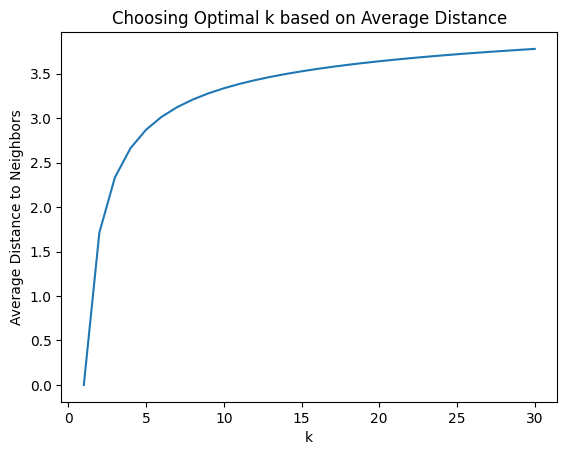

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Define a range of k values to test
k_values = range(1, 31)

# Initialize a list to store average distances for each k
average_distances = []

# Loop through each k value and compute the average distance
for k in k_values:
    knn = NearestNeighbors(n_neighbors=k, metric='euclidean')
    knn.fit(X_train)
    
    # Calculate the distances for each k
    distances, indices = knn.kneighbors(X_train)
    
    # Store the mean distance (as a proxy for performance)
    average_distance = np.mean(distances)
    average_distances.append(average_distance)

# Find the optimal k based on the smallest average distance
print(average_distances)
best_k = k_values[np.argmin(average_distances)]
print(f"Best value for k based on average distances: {best_k}")

# You can also plot the distances to visualize
plt.plot(k_values, average_distances)
plt.xlabel('k')
plt.ylabel('Average Distance to Neighbors')
plt.title('Choosing Optimal k based on Average Distance')
plt.show()


<h2>Building the KNN model based on selected k parameter</h2>

In [23]:
# Final model with the best value of k
knn_final = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn_final.fit(X_train)

NearestNeighbors(metric='euclidean')

<h2>Matching user with the group</h2>

In [24]:
print(X_test.iloc[0,:])
# Find 5 nearest neighbors for the first user in the dataset
distances, indices = knn.kneighbors([X_test.iloc[0]])  # Pass the feature vector of the first user

# Print the indices and distances of the nearest neighbors
print("Nearest Neighbors' Indices: ", indices)
print("Distances to Neighbors: ", distances)

# Retrieve the matched users based on the indices
matched_users = data.iloc[indices[0]]
print(matched_users)

Latitude               -0.148793
Longitude               1.523150
Skill_Level             2.000000
Preferred_Group_Size    2.000000
Big Data                0.000000
Data Analysis           1.000000
Machine Learning        0.000000
Python                  0.000000
SQL                     1.000000
Statistics              0.000000
Hour_0                  0.000000
Hour_1                  1.000000
Hour_2                  0.000000
Hour_3                  0.000000
Hour_4                  1.000000
Hour_5                  1.000000
Hour_6                  0.000000
Hour_7                  0.000000
Hour_8                  1.000000
Hour_9                  1.000000
Hour_10                 0.000000
Hour_11                 0.000000
Hour_12                 1.000000
Hour_13                 0.000000
Hour_14                 1.000000
Hour_15                 1.000000
Hour_16                 1.000000
Hour_17                 0.000000
Hour_18                 1.000000
Hour_19                 0.000000
Hour_20   

c:\Users\musta\Desktop\study-group\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
